# Presentación Final
## Student's Performance
Base de datos que describe los resultados de unos estudiantes después de presentar un examen con secciones de matemáticas, lectura, y escritura.

## Variables de Interés
Mis variables de interés son 'Gender', 'Race/Ethnicity', 'Parental level of education', 'Lunch', 'Test preparation course', 'Math score', 'Reading score' y 'Writing score'

*Gender es una variable categórica, explica si la persona es hombre o mujer.

*Race/Ethnicity es una variable categórica, explica a cuál raza/etnicidad pertenece la persona.

*Parental level of education es una variable categórica, explica el nivel de educación de los padres de la persona.

*Test preparation course es una variable categórica, explica si la persona se preparó o no para el examen.

*Math score es una variable numérica (int), explica el resultado de la persona en la sección de matemáticas.

*Reading score es una variable numérica (int), explica el resultado de la persona en la sección de lectura.

*Writing score es una variable numérica (int), explica el resultado de la persona en la sección de escritura.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.drop('lunch', axis =1)

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95
996,male,group C,high school,none,62,55,55
997,female,group C,high school,completed,59,71,65
998,female,group D,some college,completed,68,78,77


## Pregunta 1: ¿Cuál sección del examen tiene un mejor resultado por género?

In [7]:
pivot=pd.pivot_table(df,
                        index='gender',
                        aggfunc='mean',
                        values=['math score','reading score','writing score'],
                        margins=True,
                       )
pivot

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203
All,66.089000,69.169000,68.054000


In [8]:
pivot=pivot.drop(['All'],
                             axis= 0)

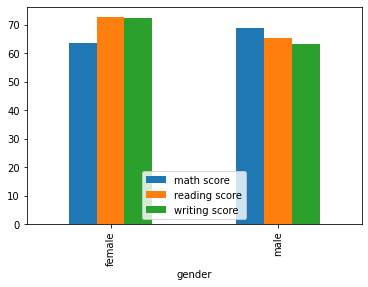

In [9]:
pivot.plot(kind = 'bar')

## Conclusión Pregunta 1:

Las mujeres tienen un mejor resultado en las secciones de lectura y escritura mientras que los hombres tienen un mejor resultado en la sección de matemáticas.

## Pregunta 2: ¿Influye la educación de los padres en el resultado del hijo?

In [10]:
pivot=pd.pivot_table(df,
                        index='parental level of education',
                        aggfunc='mean',
                        values=['math score','reading score','writing score'],
                        margins=True,
                       )
pivot

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268
All,66.089000,69.169000,68.054000


In [11]:
pivot=pivot.drop(['All'],
                             axis= 0)

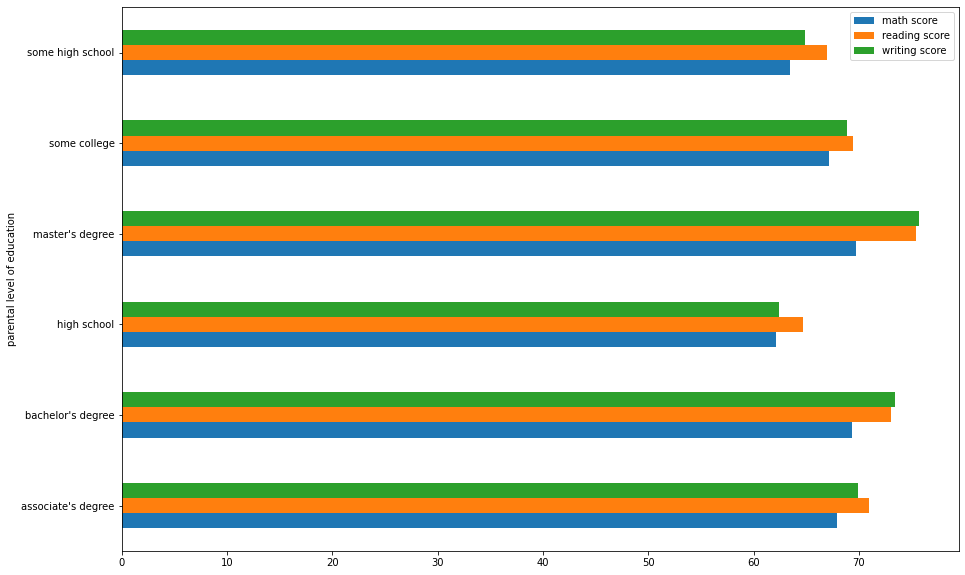

In [12]:
pivot.plot(kind = 'barh', figsize = (15,10))

## Conclusión Pregunta 2:

Existe una ligera correlación entre el nivel de estudio de los padres y los resultados de los hijos, se puede notar que los hijos de padres con master's degree tuvieron un mejor resultado mientras que los hijos de padres con puro high school tuvieron ligeramente un peor resultado.

## Pregunta 3: ¿Influye la preparación del estudiante en su resultado?¶

In [13]:
pivot=pd.pivot_table(df,
                        index='test preparation course',
                        aggfunc='mean',
                        values=['math score','reading score','writing score'],
                        margins=True,
                       )
pivot

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673
All,66.089000,69.169000,68.054000


In [14]:
pivot=pivot.drop(['All'],
                             axis= 0)

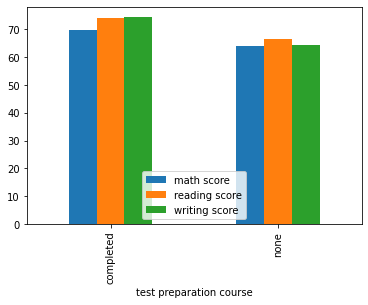

In [15]:
pivot.plot(kind = 'bar')

## Conclusión Pregunta 3:

Se observa que los estudiantes que completaron el curso de preparación para el examen tuvieron un mejor resultado que aquellos que no tomaron el curso.

## Pregunta 4: ¿Influye la la raza/etnicidad de la persona en su resultado en la sección de matemáticas?

In [16]:
pivot=pd.pivot_table(df,
                        index='race/ethnicity',
                        aggfunc='mean',
                        values=['math score'],
                        margins=True,
                       )
pivot

,math score
race/ethnicity,
group A,61.629213
group B,63.452632
group C,64.463950
group D,67.362595
group E,73.821429
All,66.089000


In [17]:
pivot=pivot.drop(['All'],
                             axis= 0)

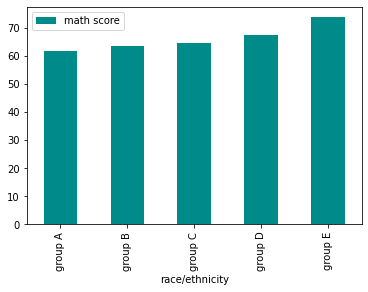

In [18]:
pivot.plot(kind = 'bar', color = 'darkcyan')

## Conclusión Pregunta 4:

Se observa que la gente que pertenece a la raza/etnicidad del grupo E obtuvo un mejor resultado en la sección de matemáticas, mientras que la gente que pertenece al grupo A tuvo ligeramente un peor resultado.

## Pregunta 5: ¿Tiene correlación el resultado de los estudiantes en la sección de escritura y lectura?

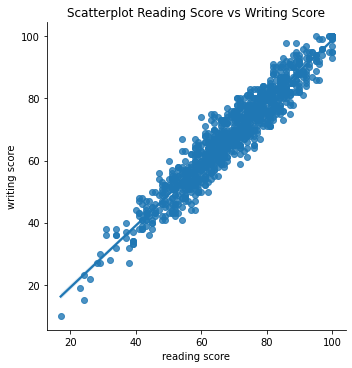

In [19]:
sns.lmplot(x = 'reading score',
           y = 'writing score',
           data = df,)
plt.title('Scatterplot Reading Score vs Writing Score')
plt.show()

## Conclusión Pregunta 5:

Se observa que si existe una fuerte correlación entre el resultado de los estudiantes en la sección de escritura y lectura.

## Limitaciones
*No viene la raza/etnicidad de manera específica, solo viene como 'grupo A'.

*En 'parental level of education' no se especifica si es el nivel de estudios del padre, de la madre, o de ambos.

## Pregunta 6: ¿?

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


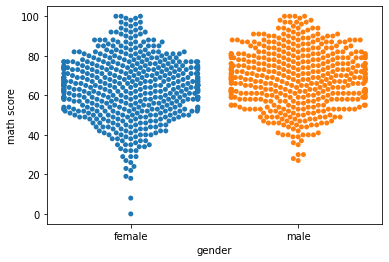

In [20]:
sns.swarmplot(x = 'gender',
              y = 'math score',
              data = df
             )

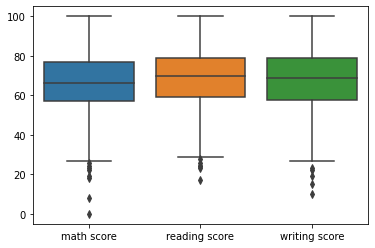

In [21]:
sns.boxplot(data = df.loc[:,['math score','reading score', 'writing score']],
           )

In [22]:
counts = df['parental level of education'].value_counts()
counts = counts.to_frame()
counts.loc[:,'parental level of education']
counts['%'] = counts.loc[:,'parental level of education']/counts.loc[:,'parental level of education'].sum(axis=0)*100
counts = counts.reindex(['some high school', 'high school', 'some college','associate\'s degree','bachelor\'s degree','master\'s degree'])
counts = counts.reset_index()
counts = counts.rename({'index': 'parental_education'},
                       axis = 1,

                      )
counts

,parental_education,parental level of education,%
0,some high school,179,17.9
1,high school,196,19.6
2,some college,226,22.6
3,associate's degree,222,22.2
4,bachelor's degree,118,11.8
5,master's degree,59,5.9


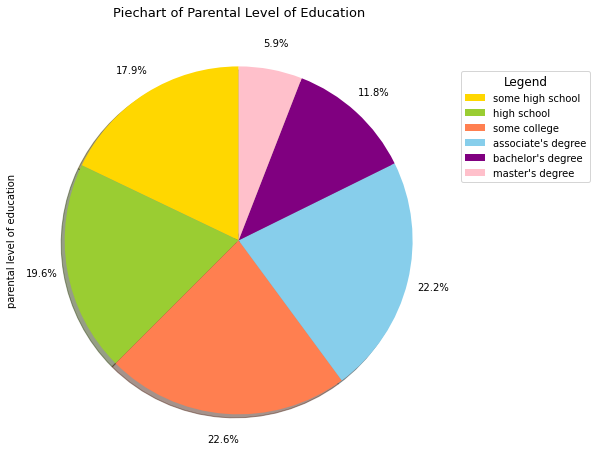

In [23]:
color_list = ['gold','yellowgreen','coral','skyblue','purple','pink']
counts['parental level of education'].plot(kind = 'pie',
                   figsize = (15, 8),
                   startangle = 90,
                   labels = None,
                   autopct = '%1.1f%%',
                   pctdistance = 1.15,
                   colors = color_list,
                   shadow = True,
                  )
plt.legend(labels = counts.parental_education,
           title = 'Legend',
           bbox_to_anchor = (1.0,0.9),
           title_fontsize = 12
          )
plt.title('Piechart of Parental Level of Education', fontsize = 13)
plt.show()

In [24]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [25]:
import statsmodels.api as sm

In [26]:
df = df.rename(columns = {'math score':'math_score'})
df = df.rename(columns = {'reading score':'reading_score'})
df = df.rename(columns = {'race/ethnicity':'race'})
df['race'] = df.race.replace({'group A':1,'group B':2,'group C':3,'group D':4,'group E':5})
df['gender'] = df.gender.replace({'male':1,'female':2})

df

,gender,race,parental level of education,lunch,test preparation course,math_score,reading_score,writing score
0,2,2,bachelor's degree,standard,none,72,72,74
1,2,3,some college,standard,completed,69,90,88
2,2,2,master's degree,standard,none,90,95,93
3,1,1,associate's degree,free/reduced,none,47,57,44
4,1,3,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,2,5,master's degree,standard,completed,88,99,95
996,1,3,high school,free/reduced,none,62,55,55
997,2,3,high school,free/reduced,completed,59,71,65
998,2,4,some college,standard,completed,68,78,77


In [27]:
modelA =sm.OLS.from_formula('math_score ~ race + gender', data = df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     40.51
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.21e-17
Time:                        05:50:17   Log-Likelihood:                -4098.2
No. Observations:                1000   AIC:                             8202.
Df Residuals:                     997   BIC:                             8217.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.8269      1.944     33.349      0.000      61.012      68.641
race           2.8391      0.399      7.114      0.000       2.056       3.622
gender        -5.1049      0.924     -5.526      0.000      -6.918      -3.292
==============================================================================
Omnibus:                       15.501   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.097
Skew:                          -0.276   Prob(JB):                     0.000320
Kurtosis:                       3.286   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
### Case study: 
print('Math score de un estudiante del race A, male: \t', 64.8269 + 2.8391*1 - 5.1049*1)

Math score de un estudiante del race A, male: 	 62.561099999999996


In [29]:
resultA.resid

0      11.704667
1       5.865558
2      29.704667
3     -15.561104
4       7.760677
         ...    
995    19.187339
996    -6.239323
997    -4.134442
998     2.026448
999    11.026448
Length: 1000, dtype: float64

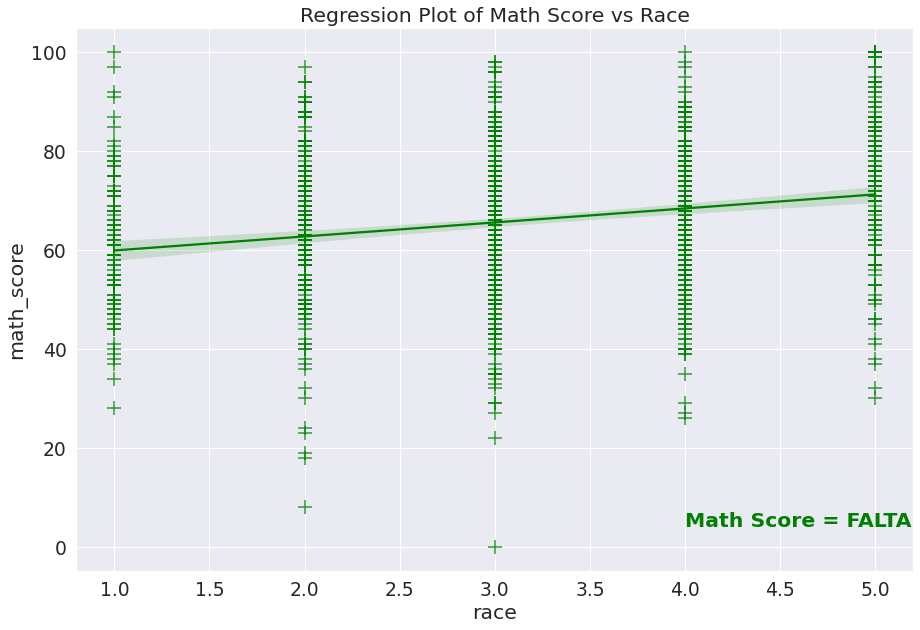

In [49]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.7)

reg_plot = sns.regplot(x = 'race',
            y = 'math_score',
            data = df,
           marker = '+',
           color = 'green',
           scatter_kws = {'s':200}
           )
reg_plot.set_title('Regression Plot of Math Score vs Race')
reg_plot.text(4, 4, 'Math Score = FALTA',
              color = 'green',
              weight = 'semibold',
              size = 'medium'
             )

             
plt.show()

In [34]:
RESIA = resultA.resid
RESIA

0      11.704667
1       5.865558
2      29.704667
3     -15.561104
4       7.760677
         ...    
995    19.187339
996    -6.239323
997    -4.134442
998     2.026448
999    11.026448
Length: 1000, dtype: float64

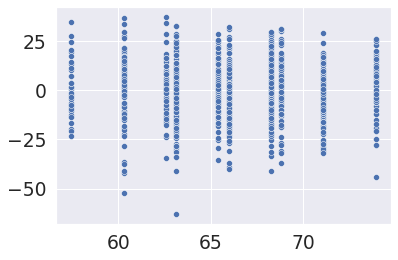

In [35]:
resi_plot = sns.scatterplot(x = resultA.fittedvalues,
                            y = RESIA)